In [ ]:
%matplotlib inline

In [ ]:
! jt -t grade3 -nf opensans

<h1><center>1. Load Data</center></h1>



In [ ]:
import os
import json

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

import pandas as pd
from sklearn.model_selection import train_test_split

from synthesized.testing.evaluation import Evaluation, synthesize_and_plot

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
evaluation_name = os.environ.get('evaluation_name', 'n/a')
branch = os.environ.get('evaluation_branch', 'n/a')
revision = os.environ.get('evaluation_revision', 'n/a')
evaluation = Evaluation(branch=branch, revision=revision, group="dataset_evaluation",
                        metrics_file="../highdim-exp/metrics-highdim-exp.jsonl")

config_path = os.environ.get('evaluation_config_path', 'configs/evaluation/highdim-exp_dataset_evaluation.json')
with open(config_path, 'r') as f:
    configs = json.load(f)
    config = configs["instances"][evaluation_name]
    evaluation.record_config(evaluation=evaluation_name, config=config)

        

In [ ]:
data = pd.read_csv(evaluation.configs[evaluation_name]['data'])
data = data.drop(evaluation.configs[evaluation_name]['ignore_columns'], axis=1)
data.dropna(inplace=True)
data.head(5)





<h1><center>2. Train model and generate synthetic data</center></h1>

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=0)
testing = synthesize_and_plot(data=data, name=evaluation_name, evaluation=evaluation, config=config,
                              eval_metrics=[], test_data=test, plot_basic=False, plot_losses=True,
                              plot_distances=True, show_distributions=True,
                              show_distribution_distances=True, show_emd_distances=True,
                              show_correlation_distances=True, show_correlation_matrix=True,
                              show_cramers_v_distances=True, show_cramers_v_matrix=True,
                              show_logistic_rsquared_distances=True, show_logistic_rsquared_matrix=True)

Identified column SeriousDlqin2yrs (int64:i) as CategoricalValue. Reason: Small (< log(N)) number of distinct values (= 2). 
Identified column SeriousDlqin2yrs (int64:i) as CategoricalValue. Reason: Small (< log(N)) number of distinct values (= 2). 
Identified column RevolvingUtilizationOfUnsecuredLines (float64:f) as ContinuousValue. Reason: Converted to numeric dtype (f) with success rate > 0.75. 
Identified column RevolvingUtilizationOfUnsecuredLines (float64:f) as ContinuousValue. Reason: Converted to numeric dtype (f) with success rate > 0.75. 
Identified column age (int64:i) as ContinuousValue. Reason: Column dtype kind is 'i'. 
Identified column age (int64:i) as ContinuousValue. Reason: Column dtype kind is 'i'. 
Identified column NumberOfTime30-59DaysPastDueNotWorse (int64:i) as CategoricalValue. Reason: Small (< log(N)) number of distinct values. 
Identified column NumberOfTime30-59DaysPastDueNotWorse (int64:i) as CategoricalValue. Reason: Small (< log(N)) number of distinct v

2020-05-20 09:20:12,739 :: DEBUG :: Identified column SeriousDlqin2yrs (int64:i) as CategoricalValue. Reason: Small (< log(N)) number of distinct values (= 2). 
2020-05-20 09:20:12,764 :: DEBUG :: Identified column RevolvingUtilizationOfUnsecuredLines (float64:f) as ContinuousValue. Reason: Converted to numeric dtype (f) with success rate > 0.75. 
2020-05-20 09:20:12,771 :: DEBUG :: Identified column age (int64:i) as ContinuousValue. Reason: Column dtype kind is 'i'. 
2020-05-20 09:20:12,809 :: DEBUG :: Identified column NumberOfTime30-59DaysPastDueNotWorse (int64:i) as CategoricalValue. Reason: Small (< log(N)) number of distinct values. 
2020-05-20 09:20:12,854 :: DEBUG :: Identified column effort (object:O) as CategoricalValue. Reason: Small (< log(N)) number of distinct values. 
2020-05-20 09:20:12,866 :: DEBUG :: Identified column MonthlyIncome (float64:f) as ContinuousValue. Reason: Converted to numeric dtype (f) with success rate > 0.75. 
2020-05-20 09:20:12,872 :: DEBUG :: Iden

## Show loss history

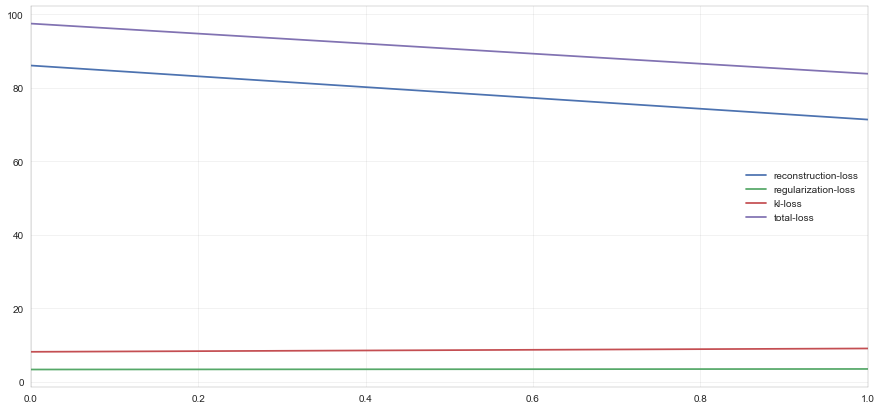

## Show average distances

## Show distributions

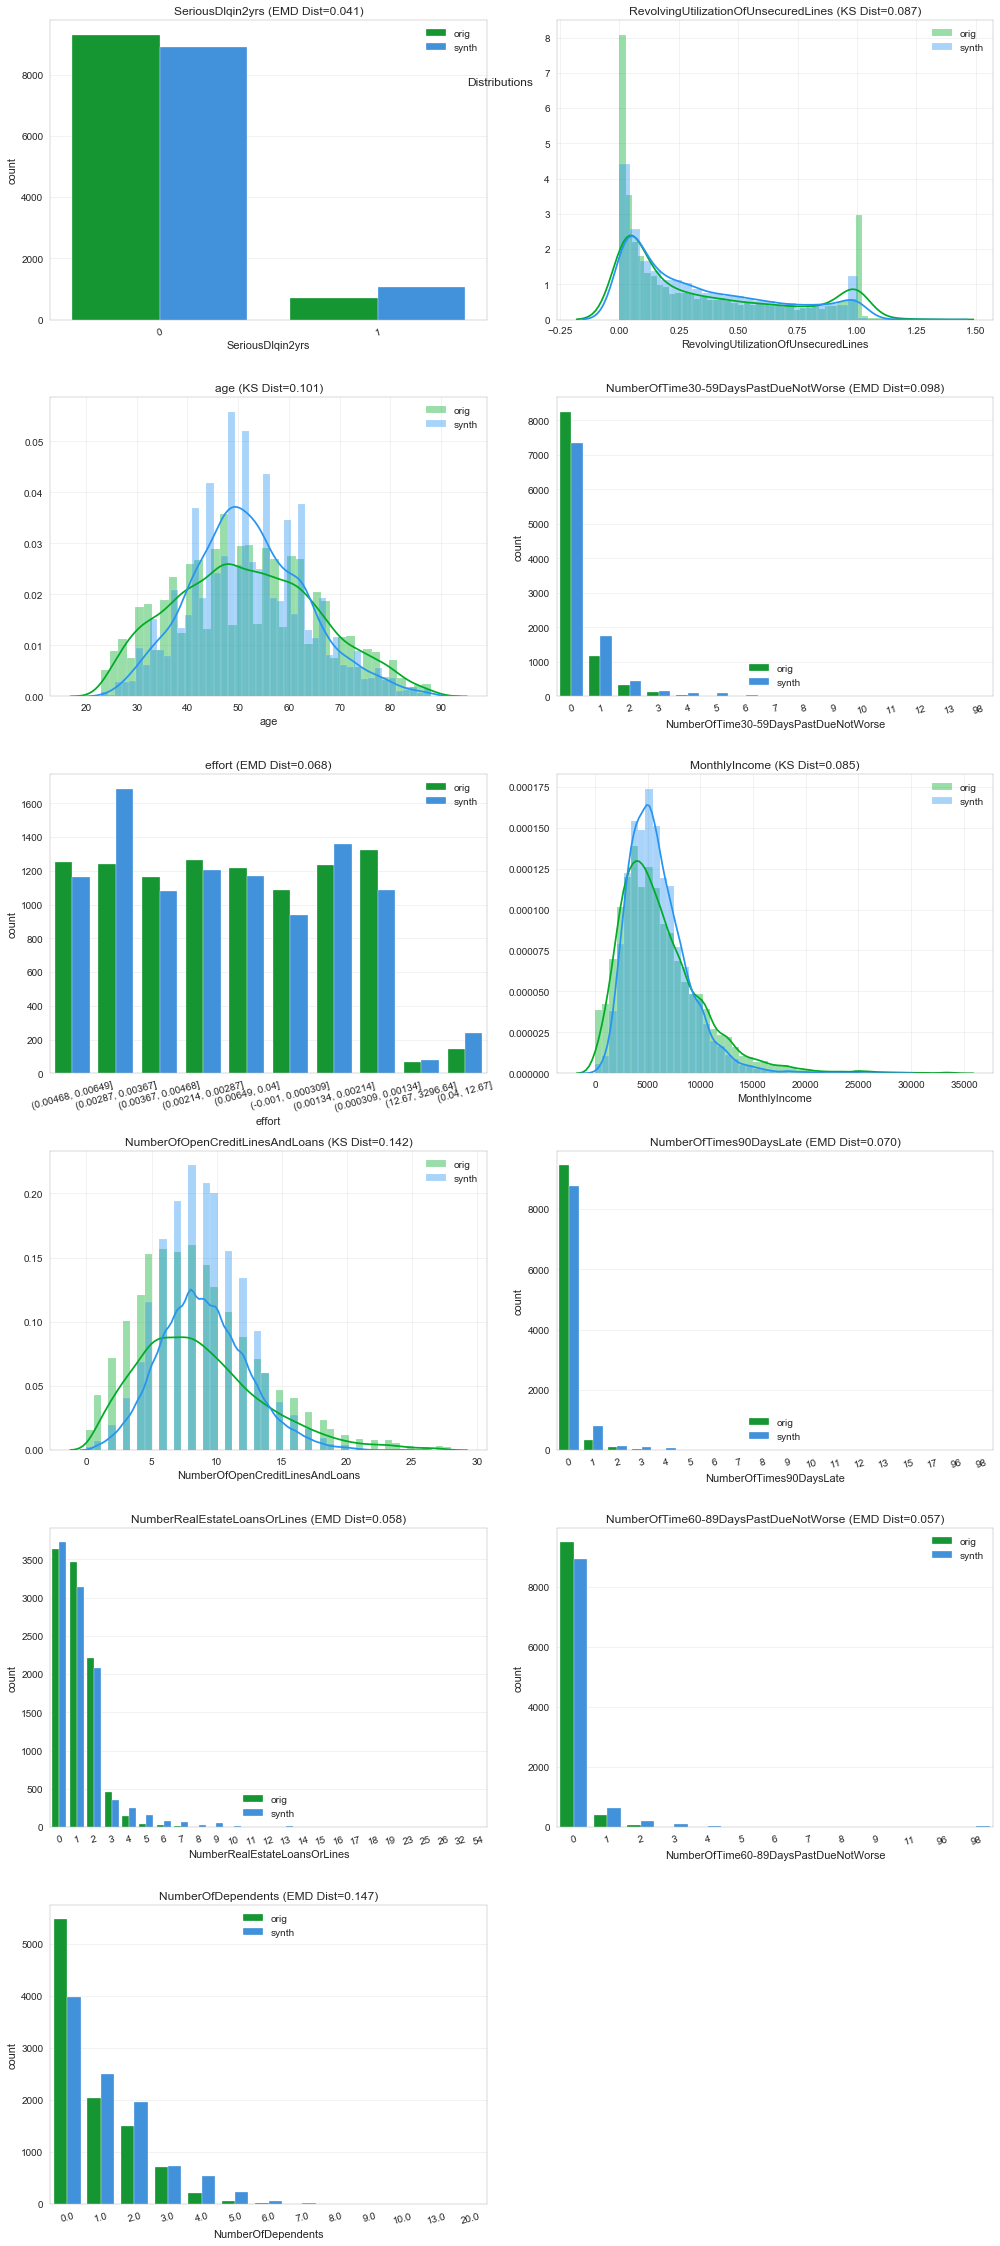

## Show distribution distances

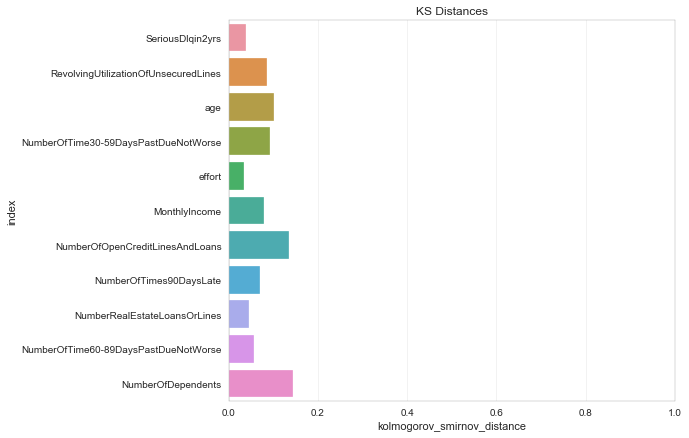

## Show EMD distances

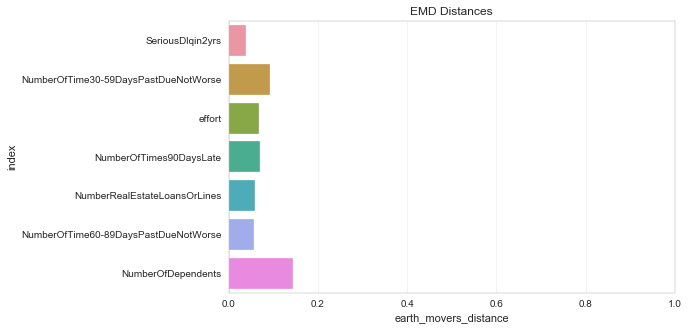

## Show correlation distances

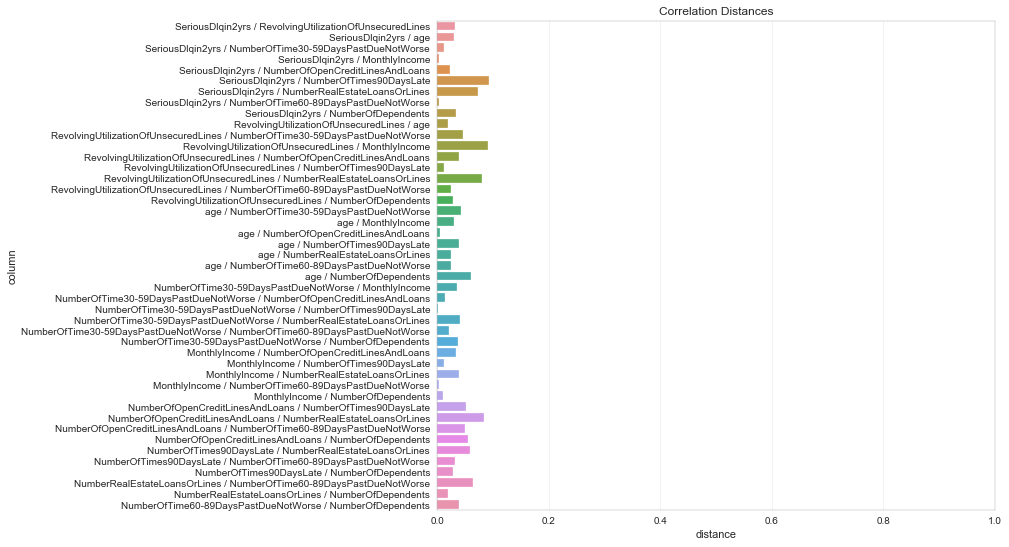

## Show correlation matrices

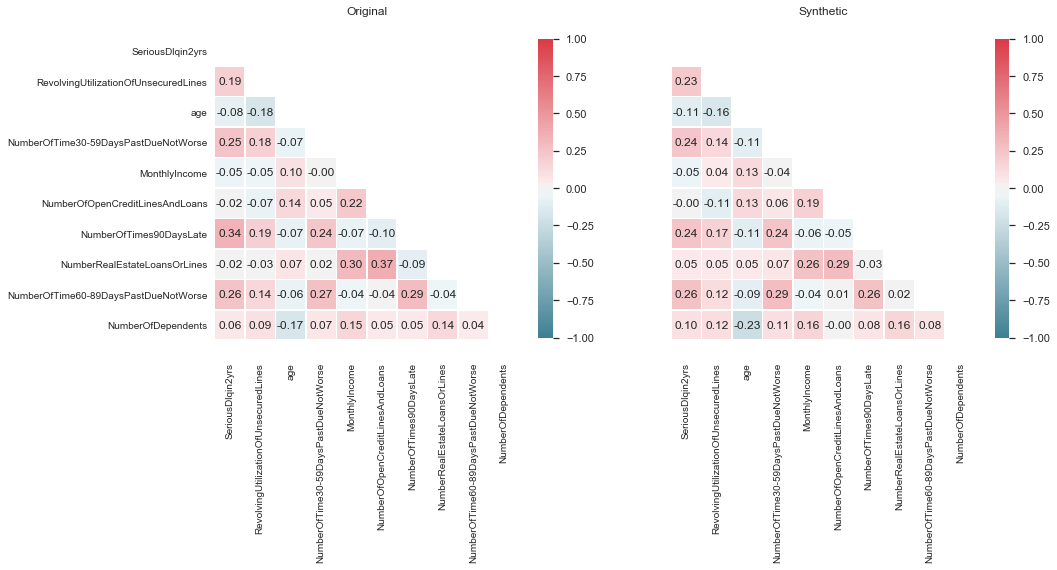

## Show Cramer's V distances

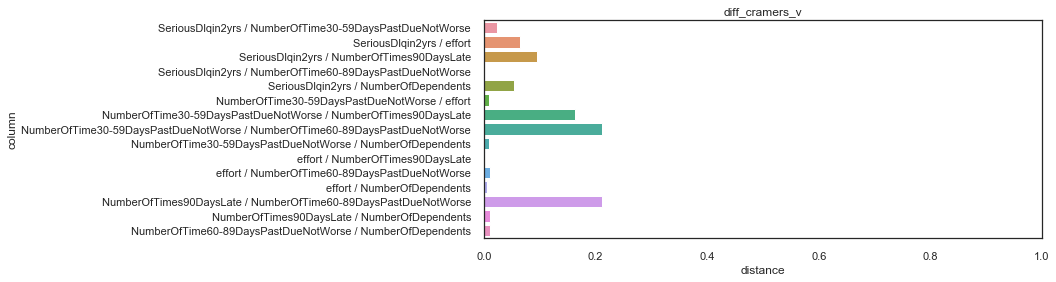

## Show Cramer's V matrices

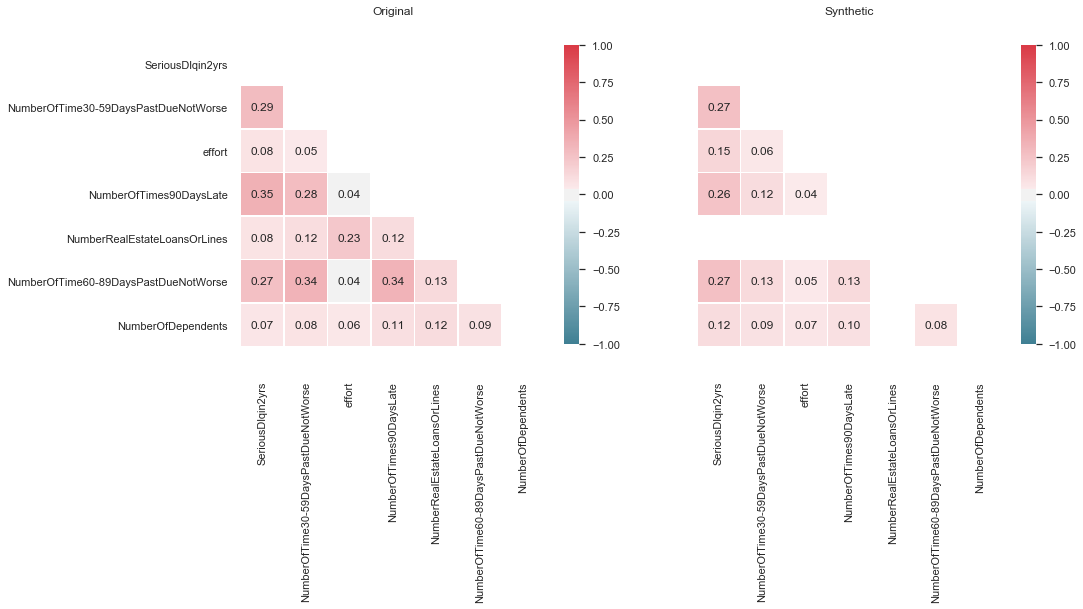

In [18]:
try:
    utility = testing.utility(target=evaluation.configs[evaluation_name]['target'])
except:
    utility = 0.0

evaluation.record_metric(evaluation=evaluation_name, key='utility', value=utility)

In [ ]:
evaluation.write_metrics()


